In [30]:
import yaml
import matplotlib.pyplot as plt
%matplotlib inline

with open('../coverage-config.yaml') as f:
    config = yaml.load(f)
    
config

{'beast_jar': 'lib/feast.jar',
 'lsd_executable': 'lsd',
 'n_taxa': 10,
 'sampling_window': 20,
 'sequence_length': 1000,
 'relaxed_clock': False,
 'mutation_rate': 0.001,
 'kappa': 2.0,
 'frequencies': [0.24, 0.26, 0.26, 0.24],
 'rate_sd': None,
 'chain_length': 1000000,
 'log_every': 1000,
 'estimate_clock_rate': False,
 'prior_params': {'clock_rate': {'m': 1.0, 's': 1.25},
  'pop_size': {'m': 2, 's': 0.6},
  'kappa': {'m': 1.0, 's': 1.25}},
 'init_values': {'clock_rate': 1.0, 'pop_size': 10, 'kappa': 2.0},
 'estimate_topology': True,
 'n_iter': 20000,
 'inference': 'mean_field',
 'burn_in': 0.1,
 'n_runs': 100,
 'out_dir': 'out-coverage'}

In [18]:
import pathlib
import pandas as pd

out_dir = pathlib.Path('..') / config['out_dir']
result_df = pd.read_csv(out_dir / 'results.csv')
result_df

,method,quantile,value,variable,seed,truth
0,BEAST,0.025,0.573040,kappa,49,2.000000
1,BEAST,0.975,2.113254,kappa,49,2.000000
2,BEAST,0.025,1.720388,pop_size,49,3.951537
3,BEAST,0.975,7.427236,pop_size,49,3.951537
4,BEAST,0.025,16.209036,tree_height,49,19.999430
5,BEAST,0.975,20.551563,tree_height,49,19.999430
6,Variational,0.025,16.415787,tree_height,49,19.999430
7,Variational,0.975,21.072207,tree_height,49,19.999430
8,Variational,0.025,1.897502,pop_size,49,3.951537
9,Variational,0.975,7.461558,pop_size,49,3.951537


In [19]:
to_use = result_df[result_df.variable.isin(['pop_size', 'tree_height'])]
pivoted = (
    to_use
        .pivot_table('value', ['method', 'variable', 'seed', 'truth'], 'quantile')
        .reset_index()
        .rename(columns={ 0.025 : 'lower', 0.975: 'upper'})
    )
pivoted

quantile,method,variable,seed,truth,lower,upper
0,BEAST,pop_size,49,3.951537,1.720388,7.427236
1,BEAST,pop_size,50,2.897327,1.609828,7.293859
2,BEAST,pop_size,51,6.207127,6.903225,21.400550
3,BEAST,pop_size,52,10.091419,6.056085,20.126478
4,BEAST,pop_size,53,8.360506,3.782903,13.378026
5,BEAST,pop_size,54,2.431902,2.750940,10.208585
6,BEAST,pop_size,55,2.789218,2.546155,9.631983
7,BEAST,pop_size,56,3.964636,2.902375,11.083140
8,BEAST,pop_size,57,6.830301,3.953759,13.412921
9,BEAST,pop_size,58,4.682763,2.251764,8.944101


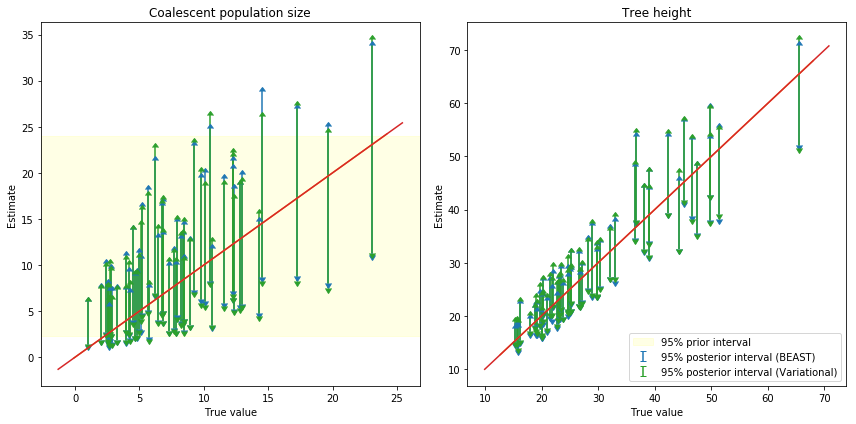

In [65]:
tidy_variable_names = {
    'tree_height': 'Tree height',
    'pop_size': 'Coalescent population size'
}

fig, axs = plt.subplots(ncols=len(pivoted.variable.unique()), figsize=(12, 6))
grouped_variable = pivoted.groupby('variable')
for ax, (variable, var_df) in zip(axs, grouped_variable):
    ax.set_title(tidy_variable_names[variable])
    for method, method_df in var_df.groupby('method'):
        y = (method_df.lower + method_df.upper)/2
        ax.errorbar(method_df.truth,
                    y,
                    (y - method_df.lower, method_df.upper - y),
                    label='95% posterior interval ({0})'.format(method),
                    fmt='none',
                    uplims=True,
                    lolims=True)
        ax.plot(list(ax.get_xlim()), list(ax.get_xlim()))
        ax.set_xlabel('True value')
        ax.set_ylabel('Estimate')
    if variable in config['prior_params']:
        prior = scipy.stats.lognorm(scale=np.exp(config['prior_params'][variable]['m']), s=config['prior_params'][variable]['s'])
        ax.axhspan(*prior.ppf([0.025, 0.975]), color='yellow', alpha=0.1, label='95% prior interval')
    
handles, labels = axs[0].get_legend_handles_labels()
axs[1].legend(handles, labels, loc='lower right')
plt.tight_layout()
plt.savefig(out_dir / 'interval_plot.png')

In [68]:
with_covered = pivoted.assign(covered = (pivoted.truth >= pivoted.lower) & (pivoted.truth <= pivoted.upper))
coverage_df = with_covered.groupby(['method', 'variable']).covered.mean().to_frame().reset_index()
print(coverage_df.rename(labmda).to_latex(index=False))
coverage_df

\begin{tabular}{llr}
\toprule
      method &     variable &   Covered \\
\midrule
       BEAST &     pop\_size &  0.942308 \\
       BEAST &  tree\_height &  0.942308 \\
 Variational &     pop\_size &  0.942308 \\
 Variational &  tree\_height &  0.942308 \\
\bottomrule
\end{tabular}



,method,variable,Covered
0,BEAST,pop_size,0.942308
1,BEAST,tree_height,0.942308
2,Variational,pop_size,0.942308
3,Variational,tree_height,0.942308
